# Programming Project #1: Hybrid Images

## CS445: Computational Photography

### Part I: Hybrid Images

In [25]:
# # Optional, if using Google Colab w/ Drive
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)



In [229]:
import cv2

import numpy as np
from matplotlib.colors import LogNorm
from scipy import signal

# modify to where you store your project data including utils.py
datadir = r"C:\Users\csiha\Downloads\project1\hybrid\image_source\\"

import utils

In [230]:
# switch from notebook to inline if using colab or otherwise cannot use interactive display)
%matplotlib notebook  
import matplotlib.pyplot as plt

In [231]:
im1_file = datadir + 'part1_tiger.jpg'
im2_file = datadir + 'part1_cat.jpg'

im1 = np.float32(cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im2 = np.float32(cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)

<IPython.core.display.Javascript object>


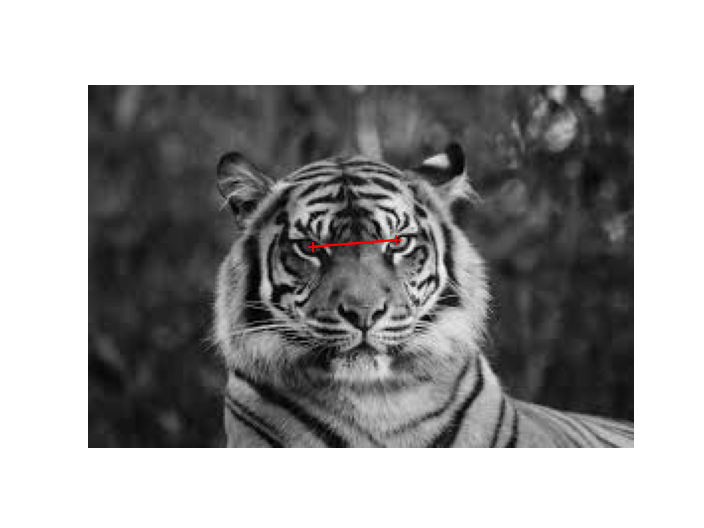

In [235]:
pts_im1 = utils.prompt_eye_selection(im1)
# pts_im1 = np.array([[607, 290], [748, 370]]) # uncomment if entering [x, y] pts manually
# plt.plot(pts_im1[:,0], pts_im1[:,1], 'r-+')

<IPython.core.display.Javascript object>


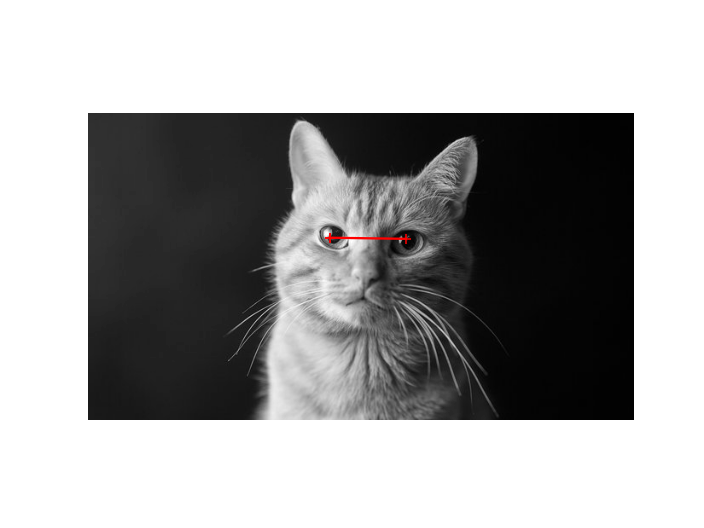

In [236]:
pts_im2 = utils.prompt_eye_selection(im2)
# pts_im2 = np.array([[299,343], [439,331]]) # uncomment if entering [x, y] pts manually
# plt.plot(pts_im2[:,0], pts_im2[:,1], 'r-+')

In [237]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)

In [238]:
# convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

<IPython.core.display.Javascript object>


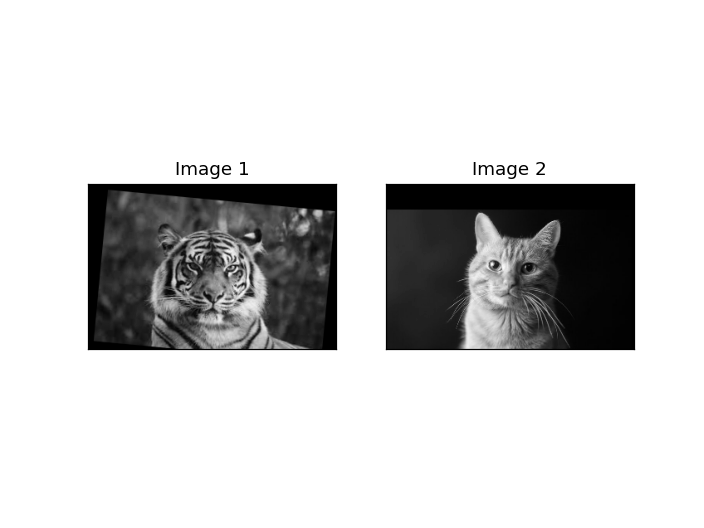

In [239]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

In [240]:
def hybridImage(im1, im2, cutoff_low, cutoff_high):
    '''
    Create hybrid image using Gaussian filtering.
    
    Inputs:
        im1: First image (for high-pass component)
        im2: Second image (for low-pass component) 
        cutoff_low: standard deviation for the low-pass filter
        cutoff_high: standard deviation for the high-pass filter
        
    Output:
        hybrid: The hybrid image
    '''
    # Convert to float for processing
    im1 = im1.astype(np.float64)
    im2 = im2.astype(np.float64)
    
    # Create Gaussian kernels using utils
    kernel_low = utils.gaussian_kernel(cutoff_low, int(3*cutoff_low))
    kernel_high = utils.gaussian_kernel(cutoff_high, int(3*cutoff_high))
    
    # Low-pass filter on im2
    low_pass = signal.convolve2d(im2, kernel_low, boundary='symm', mode='same')
    
    # High-pass filter on im1 (subtract Gaussian filtered from original)
    high_pass = im1 - signal.convolve2d(im1, kernel_high, boundary='symm', mode='same')
    
    # Combine the filtered images
    hybrid = low_pass + high_pass
    
    return hybrid

In [262]:
sigma_low =5# choose parameters that work for your images
sigma_high = 2

im_hybrid = hybridImage(im2, im1, sigma_low, sigma_high)

<IPython.core.display.Javascript object>


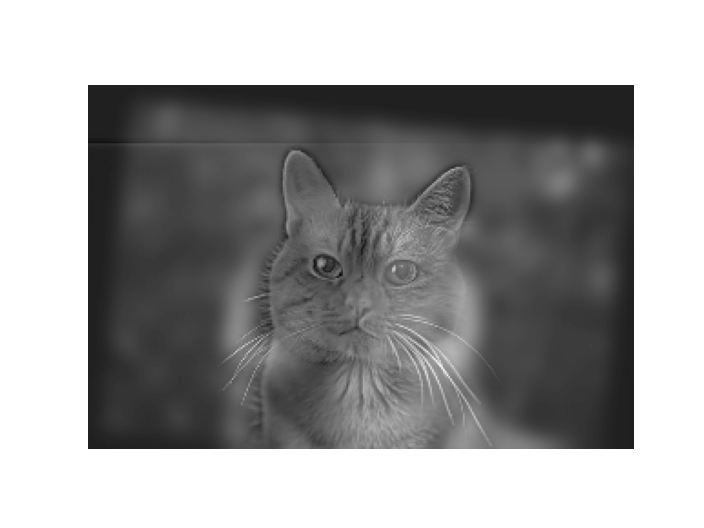

In [263]:
# Optional: Select top left corner and bottom right corner to crop image
# the function returns dictionary of 
# {
#   'cropped_image': np.ndarray of shape H x W
#   'crop_bound': np.ndarray of shape 2x2
# }
cropped_object = utils.interactive_crop(im_hybrid)

Value Ranges:
Low-pass: [0.000, 0.782]
High-pass: [-0.396, 0.497]
Hybrid: [-0.169, 1.181]
Parameters: sigma_low=5, sigma_high=2


<IPython.core.display.Javascript object>


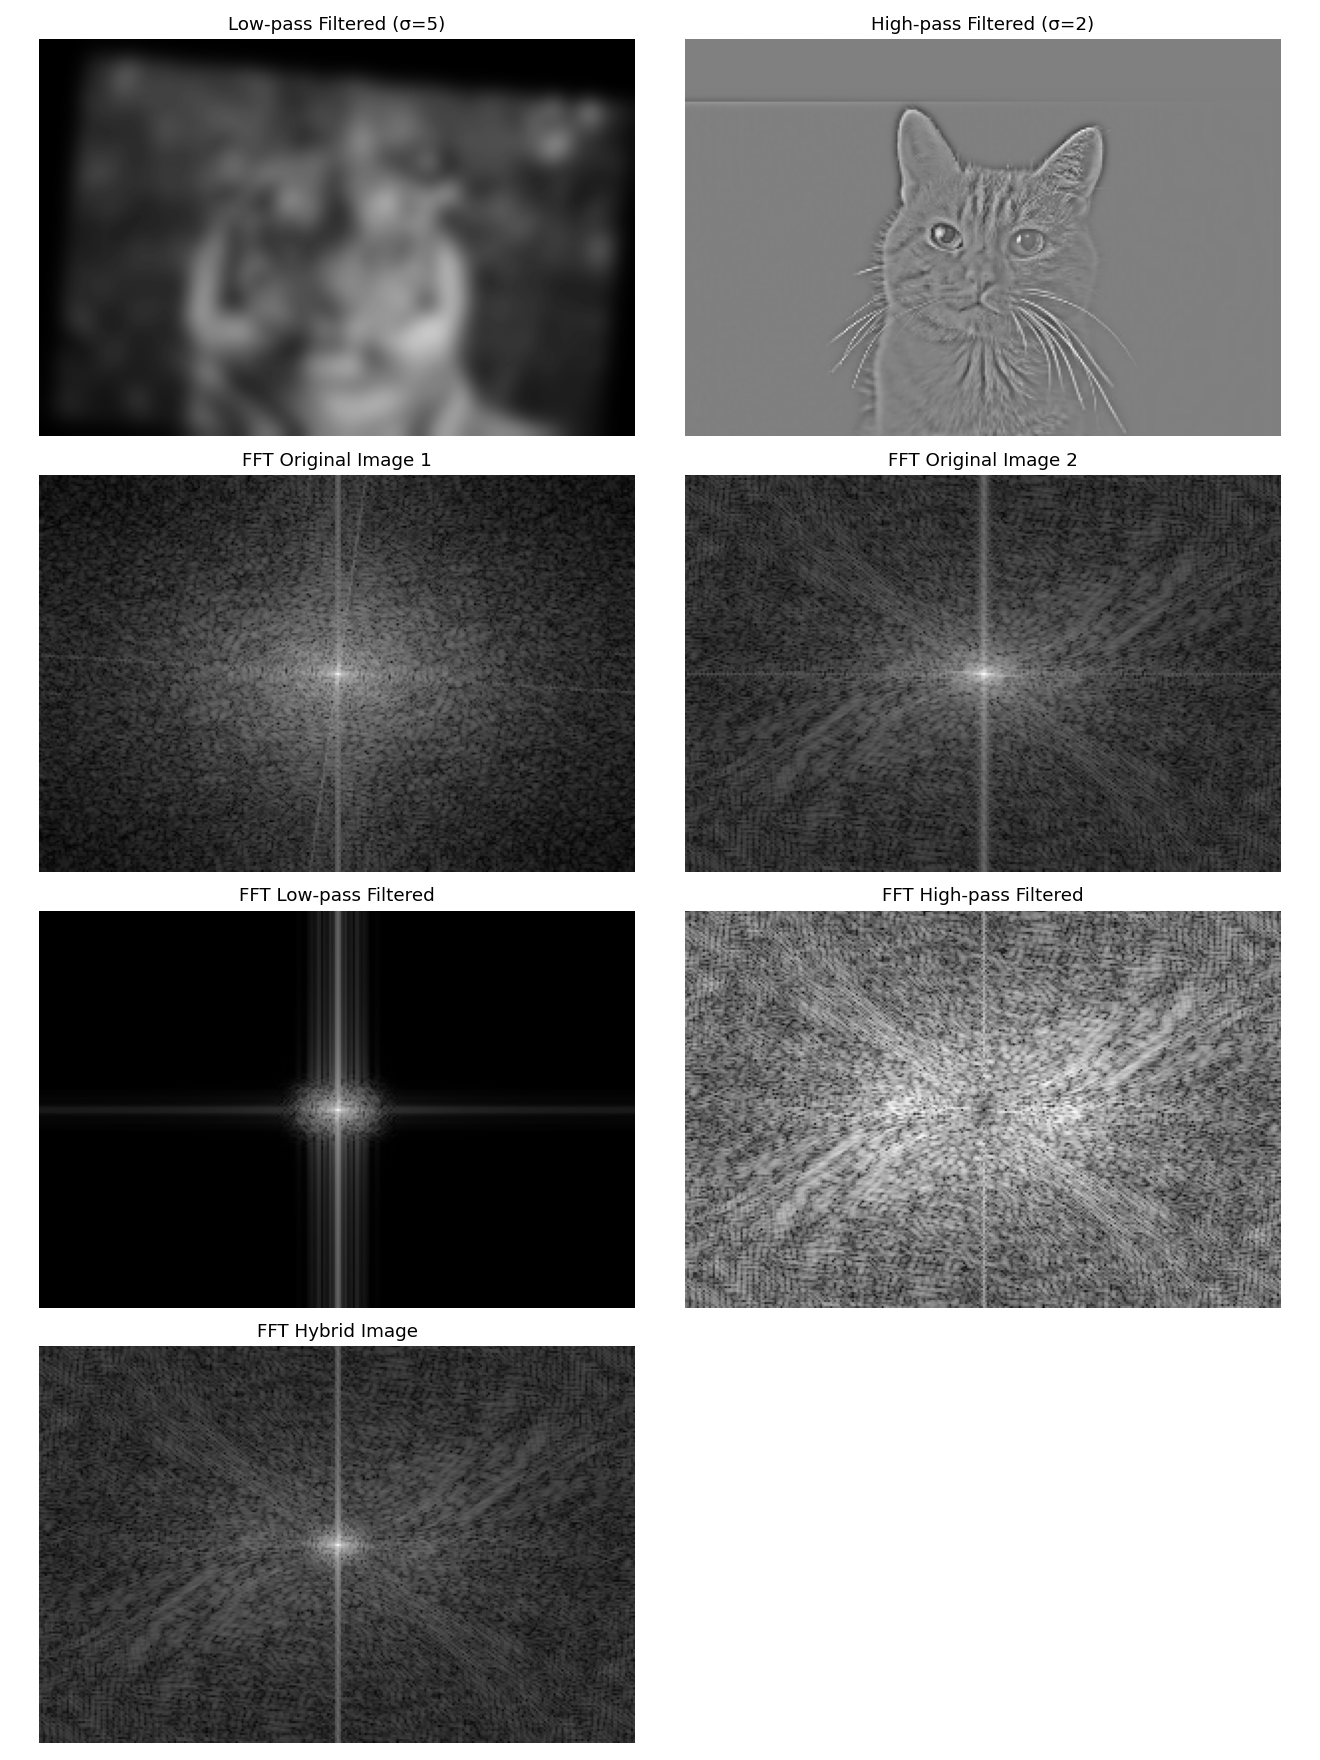

In [265]:
# Modified hybridImage function with return_filtered option
def hybridImage(im1, im2, cutoff_low, cutoff_high, return_filtered=False):
    """
    Create hybrid image using Gaussian filtering.
    
    Inputs:
        im1: First image (for high-pass component)
        im2: Second image (for low-pass component)
        cutoff_low: standard deviation for the low-pass filter
        cutoff_high: standard deviation for the high-pass filter
        return_filtered: if True, also return the filtered components
    
    Output:
        hybrid: The hybrid image
        (optional) low_pass, high_pass: The filtered components
    """
    # Convert to float for processing
    im1 = im1.astype(np.float64)
    im2 = im2.astype(np.float64)
    
    # Create Gaussian kernels using utils
    kernel_low = utils.gaussian_kernel(cutoff_low, int(3*cutoff_low))
    kernel_high = utils.gaussian_kernel(cutoff_high, int(3*cutoff_high))
    
    # Low-pass filter on im2
    low_pass = signal.convolve2d(im2, kernel_low, boundary='symm', mode='same')
    
    # High-pass filter on im1 (subtract Gaussian filtered from original)
    high_pass = im1 - signal.convolve2d(im1, kernel_high, boundary='symm', mode='same')
    
    # Combine the filtered images
    hybrid = low_pass + high_pass
    
    if return_filtered:
        return hybrid, low_pass, high_pass
    else:
        return hybrid

# Parameters
sigma_low = 5  # choose parameters that work for your images
sigma_high = 2

# Create hybrid image with filtered components
im_hybrid, low_pass_filtered, high_pass_filtered = hybridImage(im2, im1, sigma_low, sigma_high, return_filtered=True)

# Print value ranges for debugging
print("Value Ranges:")
print(f"Low-pass: [{low_pass_filtered.min():.3f}, {low_pass_filtered.max():.3f}]")
print(f"High-pass: [{high_pass_filtered.min():.3f}, {high_pass_filtered.max():.3f}]")
print(f"Hybrid: [{im_hybrid.min():.3f}, {im_hybrid.max():.3f}]")
print(f"Parameters: sigma_low={sigma_low}, sigma_high={sigma_high}")

# Calculate FFTs
fft_im1 = np.fft.fftshift(np.fft.fft2(im1))
fft_im2 = np.fft.fftshift(np.fft.fft2(im2))
fft_low_pass = np.fft.fftshift(np.fft.fft2(low_pass_filtered))
fft_high_pass = np.fft.fftshift(np.fft.fft2(high_pass_filtered))
fft_hybrid = np.fft.fftshift(np.fft.fft2(im_hybrid))

# Single comprehensive plot with 4 rows as requested
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

# Row 1: Two filtered images
axes[0, 0].imshow(low_pass_filtered, cmap='gray', vmin=0, vmax=1)
axes[0, 0].set_title(f'Low-pass Filtered (σ={sigma_low})')
axes[0, 0].axis('off')

high_pass_display = high_pass_filtered + 0.5
axes[0, 1].imshow(high_pass_display, cmap='gray', vmin=0, vmax=1)
axes[0, 1].set_title(f'High-pass Filtered (σ={sigma_high})')
axes[0, 1].axis('off')

# Row 2: Two original FFTs
axes[1, 0].imshow(np.log(np.abs(fft_im1) + 1), cmap='gray')
axes[1, 0].set_title('FFT Original Image 1')
axes[1, 0].axis('off')

axes[1, 1].imshow(np.log(np.abs(fft_im2) + 1), cmap='gray')
axes[1, 1].set_title('FFT Original Image 2')
axes[1, 1].axis('off')

# Row 3: Two filtered FFTs
axes[2, 0].imshow(np.log(np.abs(fft_low_pass) + 1), cmap='gray')
axes[2, 0].set_title('FFT Low-pass Filtered')
axes[2, 0].axis('off')

axes[2, 1].imshow(np.log(np.abs(fft_high_pass) + 1), cmap='gray')
axes[2, 1].set_title('FFT High-pass Filtered')
axes[2, 1].axis('off')

# Row 4: Hybrid FFT (center it across both columns)
axes[3, 0].imshow(np.log(np.abs(fft_hybrid) + 1), cmap='gray')
axes[3, 0].set_title('FFT Hybrid Image')
axes[3, 0].axis('off')

# Hide the second subplot in row 4 to center the hybrid FFT
axes[3, 1].axis('off')

plt.tight_layout()
plt.show()


=== SECOND HYBRID IMAGE GROUP ===
Creating hybrid image from classical and modern buildings
Classical building size: (185, 272)
Modern building size: (465, 790)
Aligned classical building size: (185, 272)
Aligned modern building size: (185, 272)


<IPython.core.display.Javascript object>


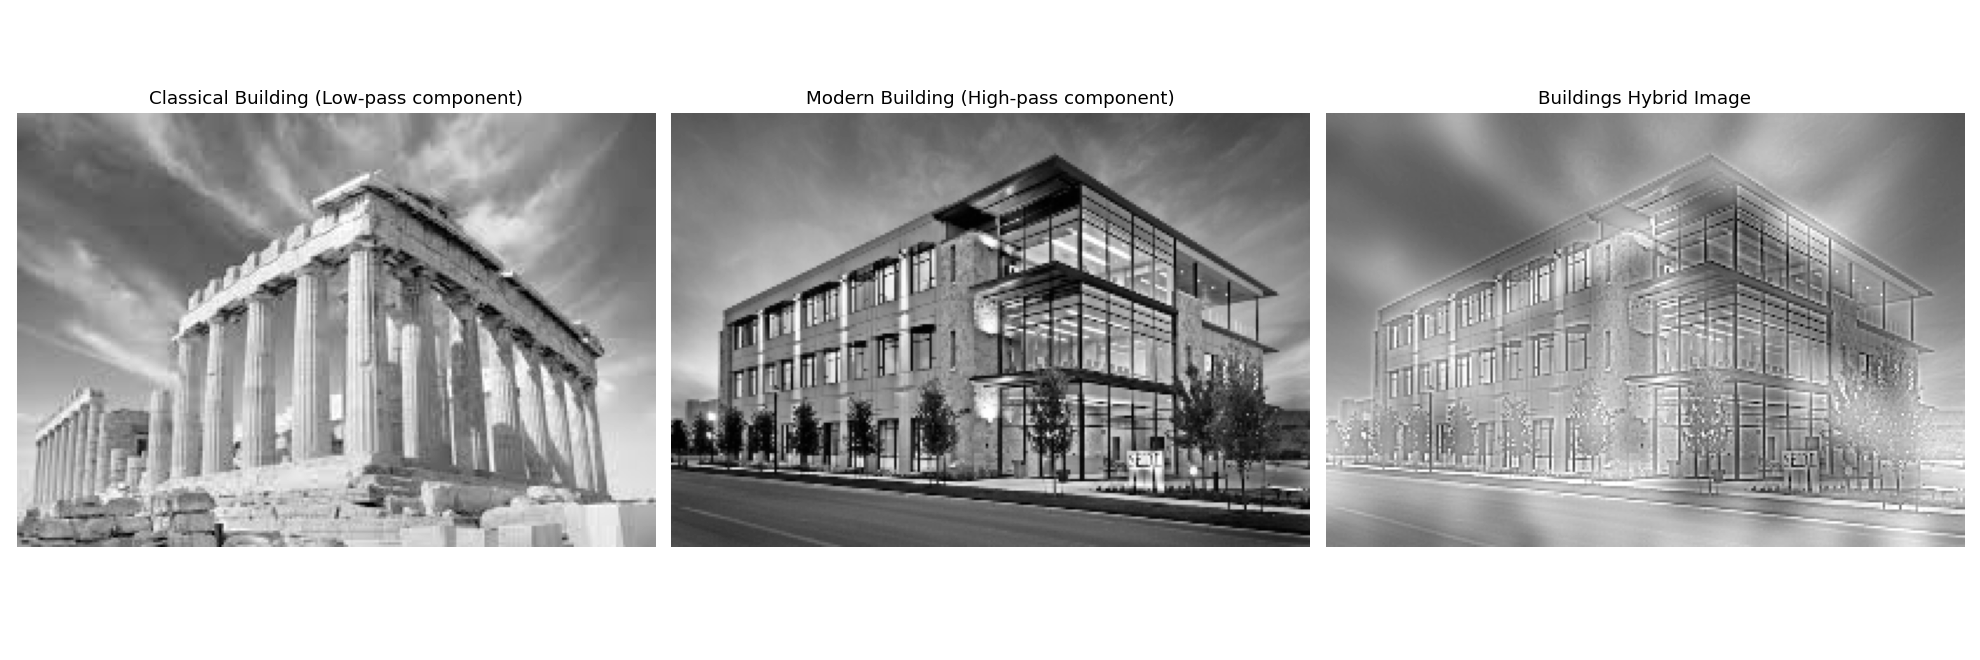

In [267]:
# Second Hybrid Image Group - Classical vs Modern Buildings
print("\n=== SECOND HYBRID IMAGE GROUP ===")
print("Creating hybrid image from classical and modern buildings")

# Load the building images
im3_file = datadir + 'part1_classical_building.jpg'
im4_file = datadir + 'part1_modern_building.jpg'

im3 = np.float32(cv2.imread(im3_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im4 = np.float32(cv2.imread(im4_file, cv2.IMREAD_GRAYSCALE) / 255.0)

# Check and display original sizes
print(f"Classical building size: {im3.shape}")
print(f"Modern building size: {im4.shape}")

# Simple resize alignment to avoid size mismatch issues
# Resize both to the smaller dimension to avoid quality loss
target_height = min(im3.shape[0], im4.shape[0])
target_width = min(im3.shape[1], im4.shape[1])

im3_aligned = cv2.resize(im3, (target_width, target_height), interpolation=cv2.INTER_LINEAR)
im4_aligned = cv2.resize(im4, (target_width, target_height), interpolation=cv2.INTER_LINEAR)

# Verify aligned sizes
print(f"Aligned classical building size: {im3_aligned.shape}")
print(f"Aligned modern building size: {im4_aligned.shape}")

# Create hybrid image with different parameters for buildings
sigma_low_buildings = 5   # For low-pass (classical building)
sigma_high_buildings = 1 # For high-pass (modern building)

im_hybrid_buildings = hybridImage(im4_aligned, im3_aligned, sigma_low_buildings, sigma_high_buildings)

# Display the building hybrid result
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(im3_aligned, cmap='gray')
axes[0].set_title('Classical Building (Low-pass component)')
axes[0].axis('off')

axes[1].imshow(im4_aligned, cmap='gray')
axes[1].set_title('Modern Building (High-pass component)')
axes[1].axis('off')

axes[2].imshow(np.clip(im_hybrid_buildings, 0, 1), cmap='gray')
axes[2].set_title('Buildings Hybrid Image')
axes[2].axis('off')

plt.tight_layout()
plt.show()


=== SECOND HYBRID IMAGE GROUP ===
Creating hybrid image from classic and modern cars
Aligned classic car size: (799, 1200)
Aligned modern car size: (799, 1200)


<IPython.core.display.Javascript object>


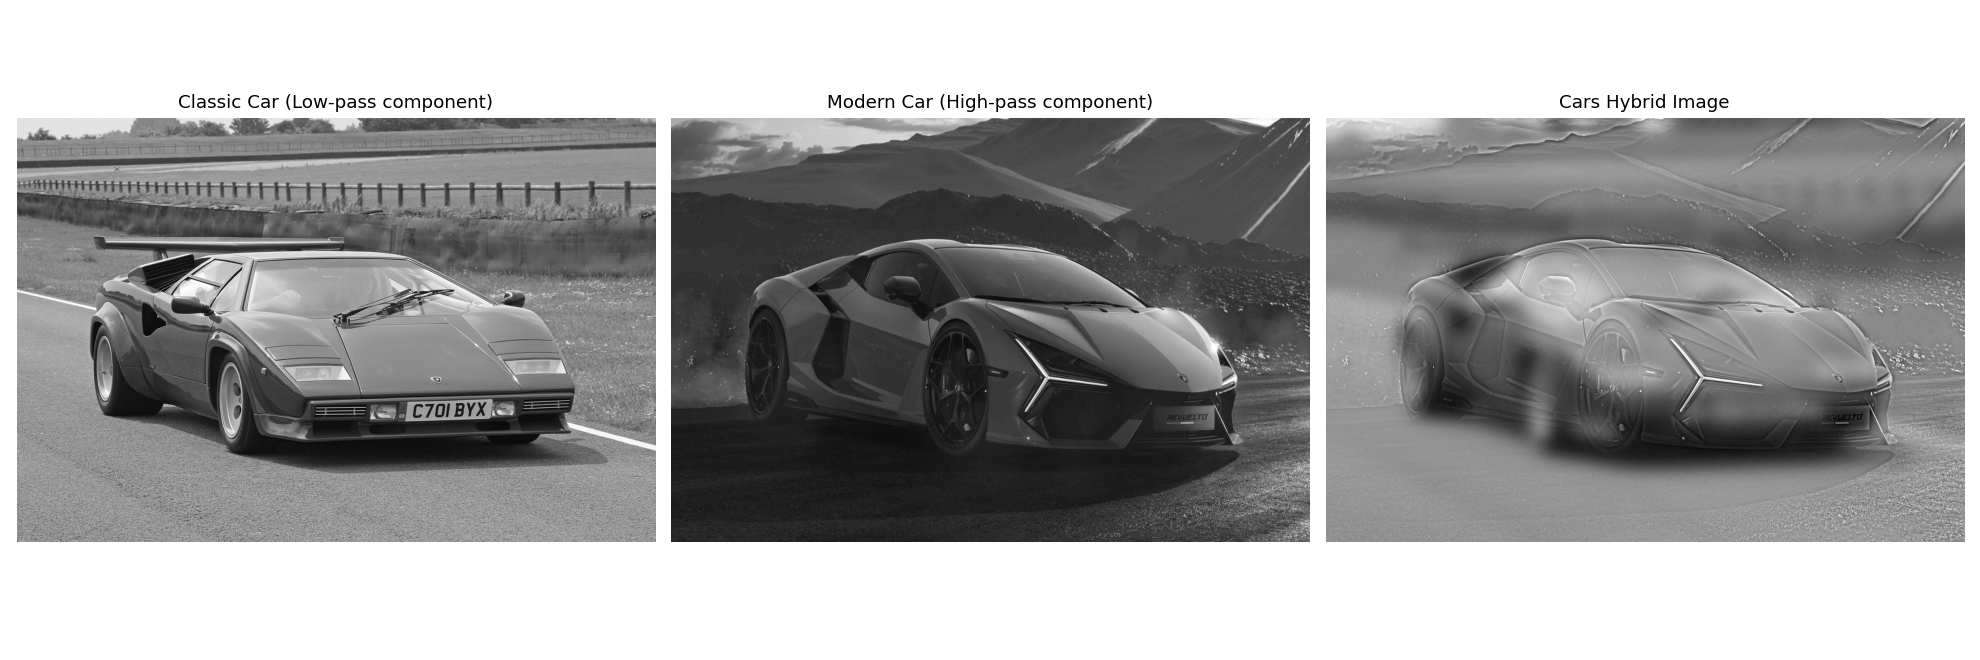

In [211]:
# Second Hybrid Image Group - Classic vs Modern Cars
print("\n=== SECOND HYBRID IMAGE GROUP ===")
print("Creating hybrid image from classic and modern cars")

# Load the car images
im3_file = datadir + 'part1_oldcar.jpg'
im4_file = datadir + 'part1_newcar.jpg'

im3 = np.float32(cv2.imread(im3_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im4 = np.float32(cv2.imread(im4_file, cv2.IMREAD_GRAYSCALE) / 255.0)

# Simple resize alignment to avoid size mismatch issues
# Resize both to the smaller dimension to avoid quality loss
target_height = min(im3.shape[0], im4.shape[0])
target_width = min(im3.shape[1], im4.shape[1])

im3_aligned = cv2.resize(im3, (target_width, target_height), interpolation=cv2.INTER_LINEAR)
im4_aligned = cv2.resize(im4, (target_width, target_height), interpolation=cv2.INTER_LINEAR)

# Verify aligned sizes
print(f"Aligned classic car size: {im3_aligned.shape}")
print(f"Aligned modern car size: {im4_aligned.shape}")

# Create hybrid image with different parameters for cars
sigma_low_cars = 15   # For low-pass (classic car)
sigma_high_cars = 5   # For high-pass (modern car)

im_hybrid_cars = hybridImage(im4_aligned, im3_aligned, sigma_low_cars, sigma_high_cars)

# Display the car hybrid result
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(im3_aligned, cmap='gray')
axes[0].set_title('Classic Car (Low-pass component)')
axes[0].axis('off')

axes[1].imshow(im4_aligned, cmap='gray')
axes[1].set_title('Modern Car (High-pass component)')
axes[1].axis('off')

axes[2].imshow(np.clip(im_hybrid_cars, 0, 1), cmap='gray')
axes[2].set_title('Cars Hybrid Image')
axes[2].axis('off')

plt.tight_layout()
plt.show()

### Part II: Image Enhancement

##### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

#### Contrast enhancement

<IPython.core.display.Javascript object>


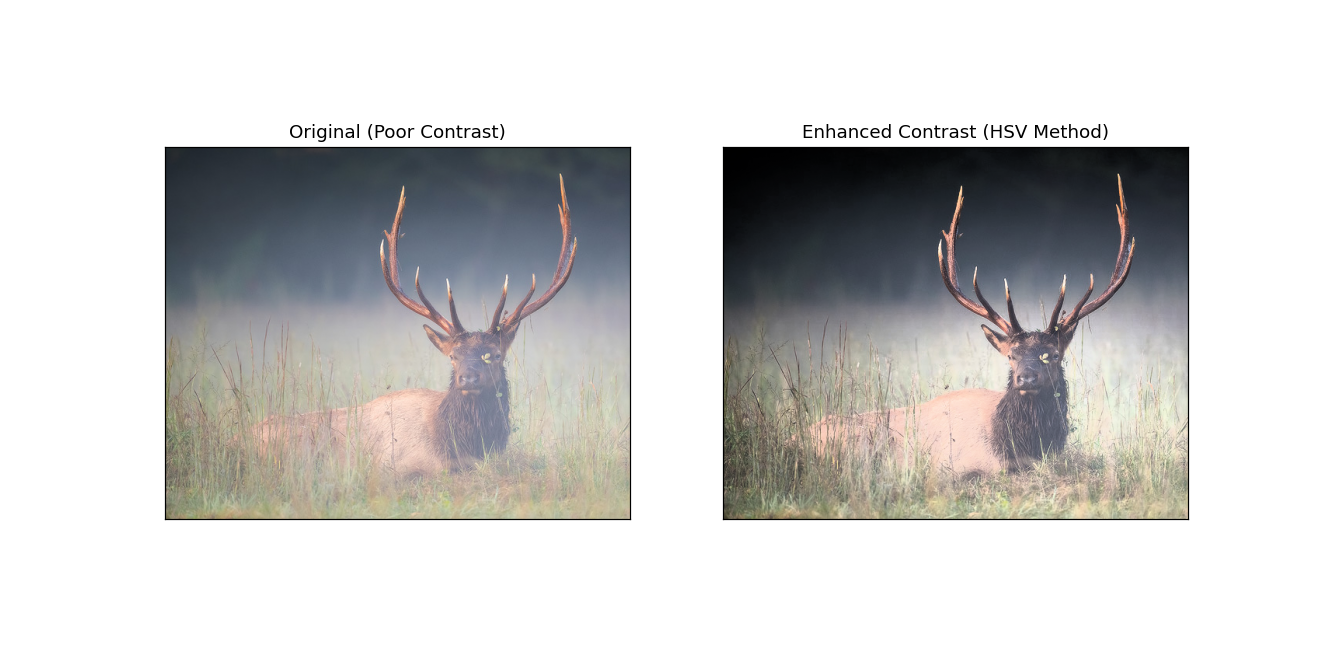

In [154]:
# Load an image with poor contrast
contrast_image_path = 'contrast_enhancement.jpg'  # MODIFY THIS PATH
contrast_img = cv2.imread(contrast_image_path)
contrast_img = cv2.cvtColor(contrast_img, cv2.COLOR_BGR2RGB) / 255.0

# Convert to HSV and apply histogram equalization to V (brightness) channel only
contrast_hsv = cv2.cvtColor((contrast_img * 255).astype(np.uint8), cv2.COLOR_RGB2HSV)
contrast_hsv[:,:,2] = cv2.equalizeHist(contrast_hsv[:,:,2])
contrast_enhanced = cv2.cvtColor(contrast_hsv, cv2.COLOR_HSV2RGB) / 255.0

# Display before/after comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(contrast_img)
axes[0].set_title('Original (Poor Contrast)')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(contrast_enhanced)
axes[1].set_title('Enhanced Contrast (HSV Method)')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

#### Color enhancement 

<IPython.core.display.Javascript object>


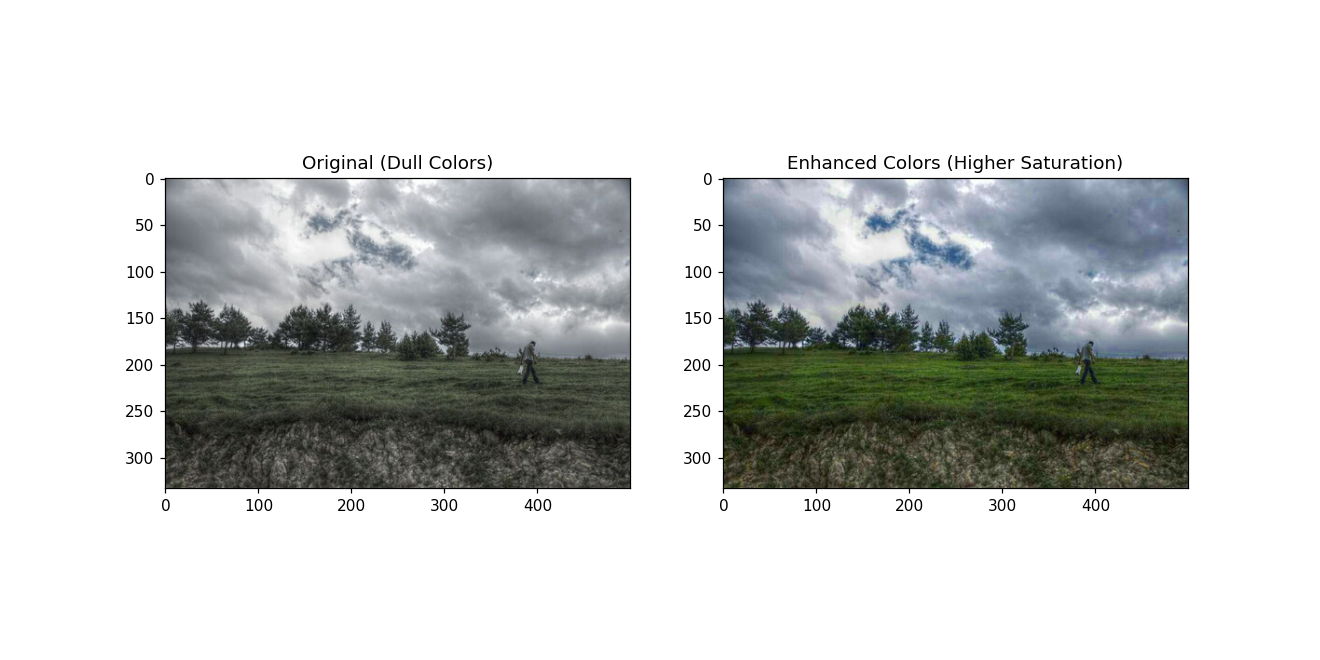

In [155]:
# Load a color image that needs vivid colors
color_image_path = 'color_enhancement.jpg'  # MODIFY THIS PATH
color_img = cv2.imread(color_image_path)
color_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)

# Convert to HSV color space
hsv_img = cv2.cvtColor(color_img, cv2.COLOR_RGB2HSV)

# Enhance saturation channel (make colors more vivid)
hsv_enhanced = hsv_img.copy()
saturation_factor =   # Increase saturation by 50%
hsv_enhanced[:,:,1] = np.clip(hsv_enhanced[:,:,1] * saturation_factor, 0, 255)

# Convert back to RGB
color_enhanced = cv2.cvtColor(hsv_enhanced, cv2.COLOR_HSV2RGB)

# Display before/after comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(color_img)
axes[0].set_title('Original (Dull Colors)')
axes[1].imshow(color_enhanced)
axes[1].set_title('Enhanced Colors (Higher Saturation)')
plt.show()

#### Color shift

<IPython.core.display.Javascript object>


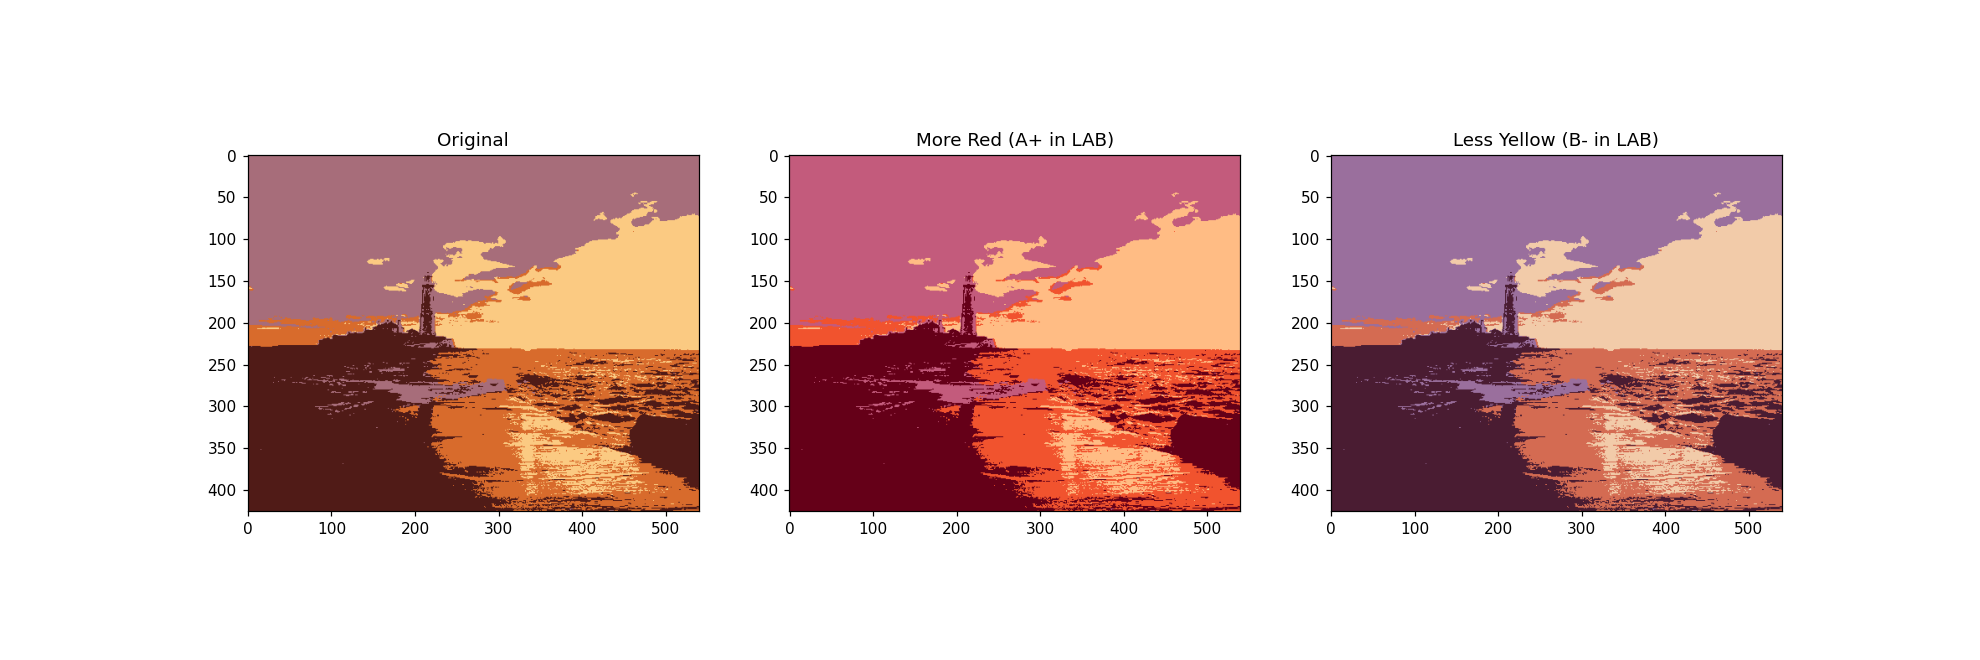

In [156]:
# Load an image for color shifting
shift_image_path = 'color_shift.jpg'  # MODIFY THIS PATH
shift_img = cv2.imread(shift_image_path)
shift_img = cv2.cvtColor(shift_img, cv2.COLOR_BGR2RGB)

# Convert to LAB color space (preserves luminance)
lab_img = cv2.cvtColor(shift_img, cv2.COLOR_RGB2LAB)

# Version A: More red (shift A channel towards red)
lab_more_red = lab_img.copy()
lab_more_red[:,:,1] = np.clip(lab_more_red[:,:,1] + 20, 0, 255)  # Increase A channel
more_red_img = cv2.cvtColor(lab_more_red, cv2.COLOR_LAB2RGB)

# Version B: Less yellow (shift B channel away from yellow)
lab_less_yellow = lab_img.copy()
lab_less_yellow[:,:,2] = np.clip(lab_less_yellow[:,:,2] - 20, 0, 255)  # Decrease B channel
less_yellow_img = cv2.cvtColor(lab_less_yellow, cv2.COLOR_LAB2RGB)

# Display all three versions
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(shift_img)
axes[0].set_title('Original')
axes[1].imshow(more_red_img)
axes[1].set_title('More Red (A+ in LAB)')
axes[2].imshow(less_yellow_img)
axes[2].set_title('Less Yellow (B- in LAB)')
plt.show()

<IPython.core.display.Javascript object>


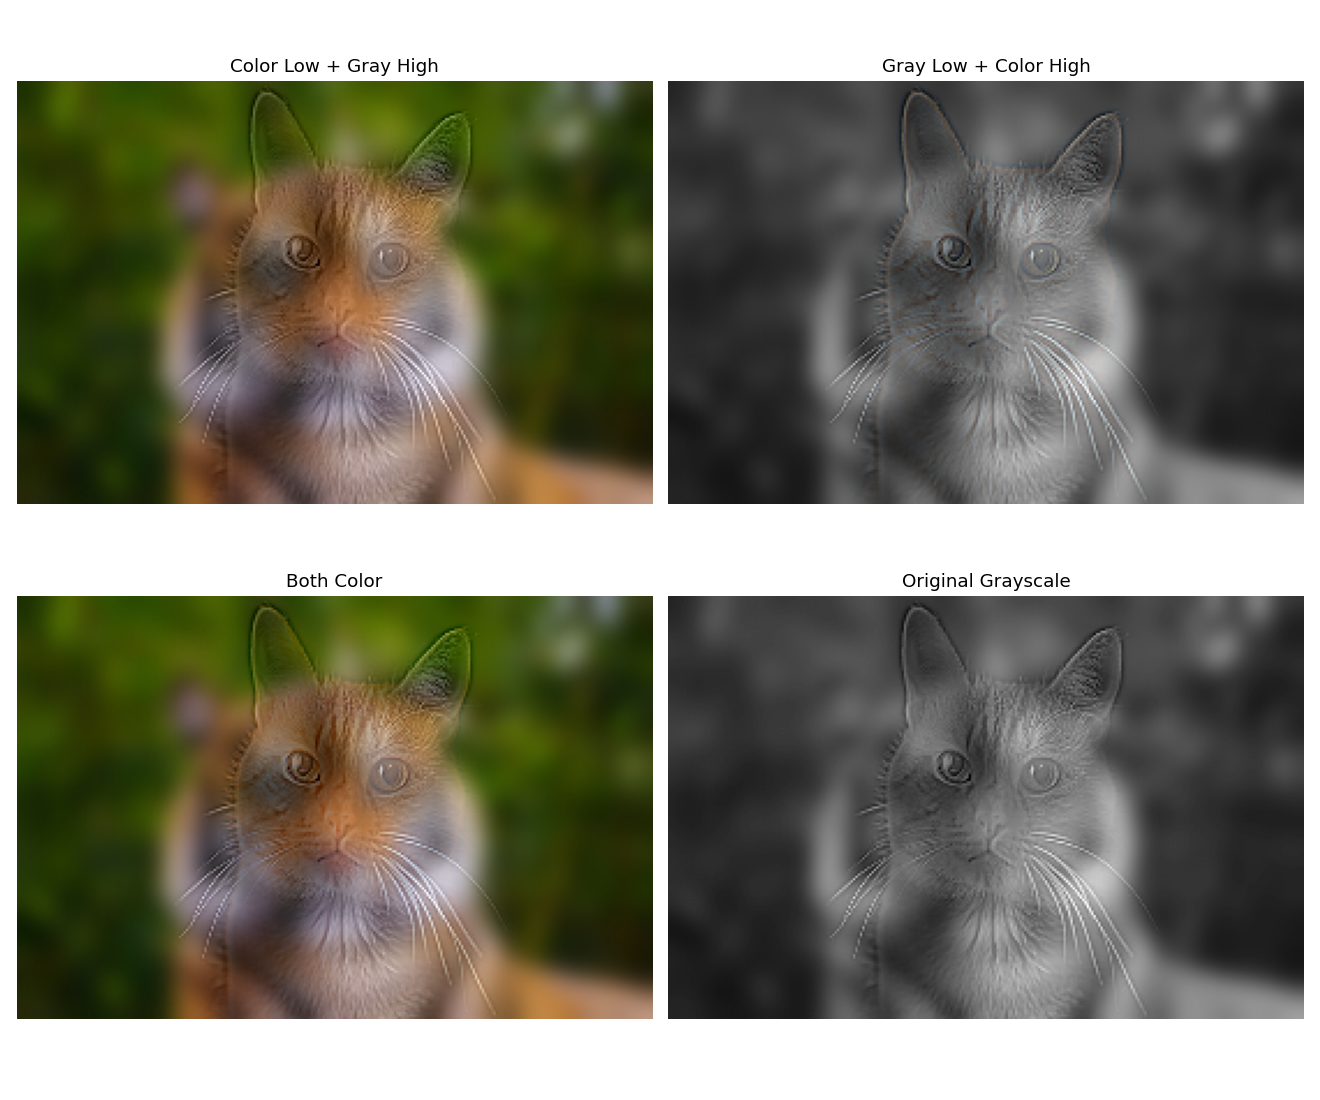

In [163]:
# Color Hybrid Images - Test different color combinations

# First, define the missing functions
def low_pass_filter(image, sigma):
    """Apply low-pass filter using Gaussian blur"""
    if len(image.shape) == 3:  # Color image
        result = np.zeros_like(image)
        kernel = utils.gaussian_kernel(sigma, int(3*sigma))
        for i in range(3):  # Apply to each channel
            result[:,:,i] = signal.convolve2d(image[:,:,i], kernel, boundary='symm', mode='same')
        return result
    else:  # Grayscale image
        kernel = utils.gaussian_kernel(sigma, int(3*sigma))
        return signal.convolve2d(image, kernel, boundary='symm', mode='same')

def high_pass_filter(image, sigma):
    """Apply high-pass filter by subtracting low-pass from original"""
    return image - low_pass_filter(image, sigma)

# Load color images
im1_color = cv2.imread(im1_file)
im1_color = cv2.cvtColor(im1_color, cv2.COLOR_BGR2RGB) / 255.0
im2_color = cv2.imread(im2_file)
im2_color = cv2.cvtColor(im2_color, cv2.COLOR_BGR2RGB) / 255.0

# Resize to match
im2_color = cv2.resize(im2_color, (im1_color.shape[1], im1_color.shape[0]))

# Define cutoff frequency (using your sigma values)
cutoff_frequency = 5  # Changed from 12 to 5

# Test 1: Color low-freq + Grayscale high-freq
low_freq_color = low_pass_filter(im1_color, cutoff_frequency)

# FIX: Convert to uint8 before cv2.cvtColor, then back to float
im2_color_uint8 = (im2_color * 255).astype(np.uint8)
im2_gray = cv2.cvtColor(im2_color_uint8, cv2.COLOR_RGB2GRAY) / 255.0
high_freq_gray = high_pass_filter(im2_gray, 1)  # Changed from 6 to 1
high_freq_gray_rgb = np.stack([high_freq_gray, high_freq_gray, high_freq_gray], axis=2)
hybrid_color_low = low_freq_color + high_freq_gray_rgb

# Test 2: Grayscale low-freq + Color high-freq
im1_color_uint8 = (im1_color * 255).astype(np.uint8)
im1_gray = cv2.cvtColor(im1_color_uint8, cv2.COLOR_RGB2GRAY) / 255.0
low_freq_gray = low_pass_filter(im1_gray, cutoff_frequency)
low_freq_gray_rgb = np.stack([low_freq_gray, low_freq_gray, low_freq_gray], axis=2)
high_freq_color = high_pass_filter(im2_color, 1)  # Changed from 6 to 1
hybrid_color_high = low_freq_gray_rgb + high_freq_color

# Test 3: Both color
hybrid_both_color = low_freq_color + high_pass_filter(im2_color, 1)  # Changed from 6 to 1

# Create grayscale version for comparison
hybrid_grayscale = hybridImage(im2_gray, im1_gray, 5, 1)  # Changed from (12, 6) to (5, 1)

# Display comparison
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Clip values to valid range for display
hybrid_color_low_clipped = np.clip(hybrid_color_low, 0, 1)
hybrid_color_high_clipped = np.clip(hybrid_color_high, 0, 1)
hybrid_both_color_clipped = np.clip(hybrid_both_color, 0, 1)
hybrid_grayscale_clipped = np.clip(hybrid_grayscale, 0, 1)

axes[0,0].imshow(hybrid_color_low_clipped)
axes[0,0].set_title('Color Low + Gray High')
axes[0,0].axis('off')

axes[0,1].imshow(hybrid_color_high_clipped)
axes[0,1].set_title('Gray Low + Color High')
axes[0,1].axis('off')

axes[1,0].imshow(hybrid_both_color_clipped)
axes[1,0].set_title('Both Color')
axes[1,0].axis('off')

axes[1,1].imshow(hybrid_grayscale_clipped, cmap='gray')
axes[1,1].set_title('Original Grayscale')
axes[1,1].axis('off')

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


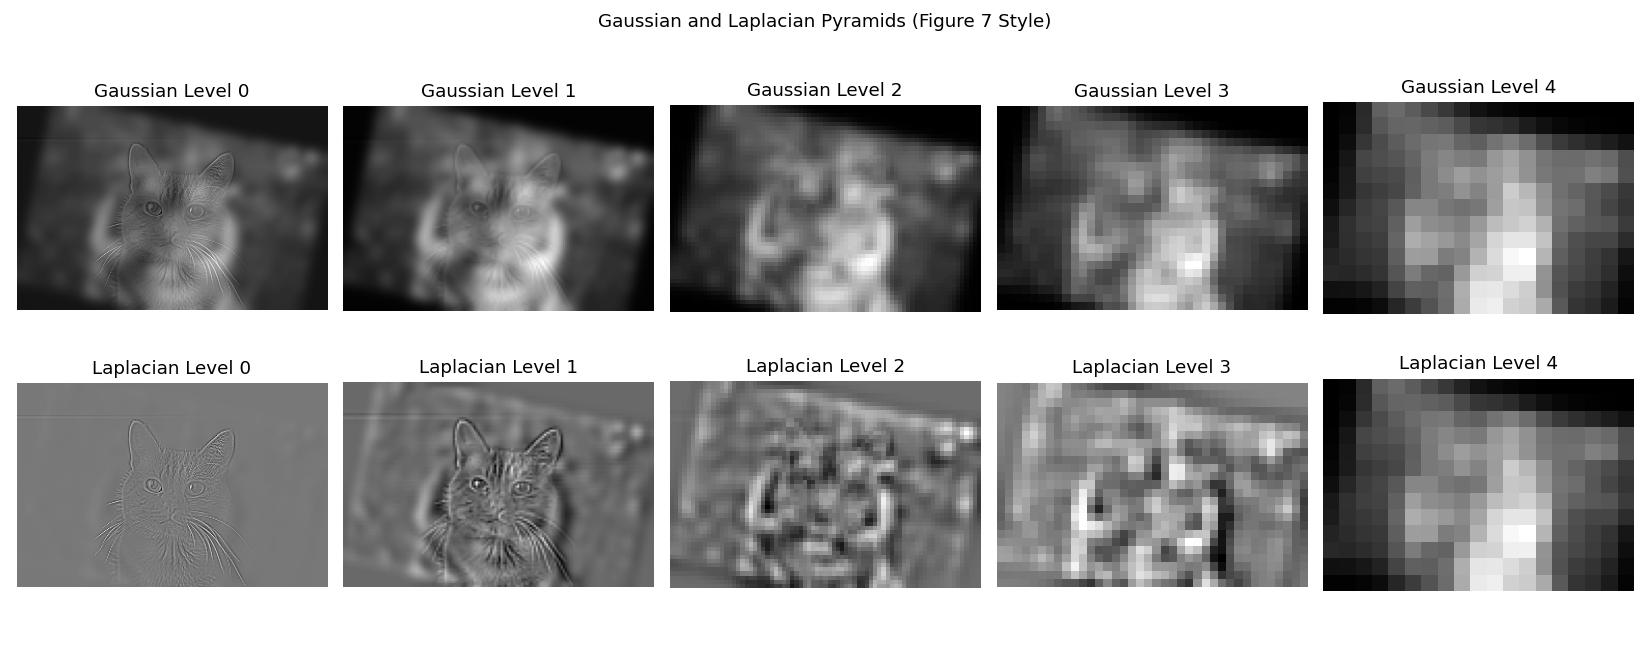

In [173]:
# Gaussian and Laplacian Pyramids (Figure 7 recreation)
def build_gaussian_pyramid(image, levels=5):
    pyramid = [image]
    for i in range(levels-1):
        # Apply Gaussian blur and downsample
        blurred = cv2.GaussianBlur(pyramid[-1], (5, 5), 1.0)
        downsampled = blurred[::2, ::2]  # Downsample by factor of 2
        pyramid.append(downsampled)
    return pyramid

def build_laplacian_pyramid(gaussian_pyramid):
    laplacian_pyramid = []
    for i in range(len(gaussian_pyramid)-1):
        # Upsample the next level
        upsampled = cv2.resize(gaussian_pyramid[i+1],
                              (gaussian_pyramid[i].shape[1], gaussian_pyramid[i].shape[0]))
        # Laplacian = current - upsampled_next
        laplacian = gaussian_pyramid[i] - upsampled
        laplacian_pyramid.append(laplacian)
    # Add the smallest Gaussian level
    laplacian_pyramid.append(gaussian_pyramid[-1])
    return laplacian_pyramid

# Build pyramids for your best hybrid result
# Use one of your existing hybrid variables:
gauss_pyramid = build_gaussian_pyramid(im_hybrid)  # Changed from hybrid_result to im_hybrid
lap_pyramid = build_laplacian_pyramid(gauss_pyramid)

# Display pyramids (similar to Figure 7)
fig, axes = plt.subplots(2, len(gauss_pyramid), figsize=(15, 6))
for i, (gauss, lap) in enumerate(zip(gauss_pyramid, lap_pyramid)):
    axes[0,i].imshow(gauss, cmap='gray')
    axes[0,i].set_title(f'Gaussian Level {i}')
    axes[0,i].axis('off')
    
    axes[1,i].imshow(lap, cmap='gray')
    axes[1,i].set_title(f'Laplacian Level {i}')
    axes[1,i].axis('off')

plt.suptitle('Gaussian and Laplacian Pyramids (Figure 7 Style)')
plt.tight_layout()
plt.show()